<a href="https://colab.research.google.com/github/OrangeCoding2021/mariokart-wrs-analysis/blob/main/PredictMarioKartWR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! Welcome to my analysis of Mario Kart world records. To make sure I am using data mostly correct at least, I limited my input to games since Mario Kart Wii.

I used data from mkwrs.com

The question to be answered with this is using past data, is it possibly to predict at least the path of the first month of Mario Kart world records




In [39]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [40]:
# Create dataframes of each csv. Grab only the needed columns and rename them
df_mkwii = pd.read_csv("mkw_wrs.csv",header=None, usecols=[1,3,4,5,6])
df_mk7 = pd.read_csv("mk7_wrs.csv",header=None, usecols=[1,2,3,4,6])
df_mk8 = pd.read_csv("mk8_wrs.csv",header=None, usecols=[1,2,3,4,6])
df_mk8d = pd.read_csv("mk8dx_wrs.csv",header=None, usecols=[1,2,3,4,6,25])
df_mkworld = pd.read_csv("mkworld_wrs.csv",header=None, usecols=[1,2,3,4,6])
# Rename
df_mkworld = df_mkworld.rename(columns={1: 'Name', 6: 'Location', 2: 'Date', 3:'Course',4:'Time'})
df_mk8d = df_mk8d.rename(columns={1: 'Name', 6: 'Location', 2: 'Date', 3:'Course',4:'Time',25:'cc'})
df_mk8 = df_mk8.rename(columns={1: 'Name', 6: 'Location', 2: 'Date', 3:'Course',4:'Time'})
df_mk7 = df_mk7.rename(columns={1: 'Name', 6: 'Location', 2: 'Date', 3:'Course',4:'Time'})
df_mkwii = df_mkwii.rename(columns={1: 'Name', 3: 'Location', 4: 'Date', 5:'Course',6:'Time'})
# Reorder wii
df_mkwii = df_mkwii.iloc[:, [0, 1, 3, 2, 4]]
my_list_of_df = [df_mkworld,df_mk8d,df_mk8,df_mk7,df_mkwii]

In [41]:
# Sort out 200cc and 150cc
mask = df_mk8d['cc'] == 200
df_mk8d_200 = df_mk8d[mask].copy()
df_mk8d_150 = df_mk8d[~mask].copy()

# Drop the cc column since that is no longer needed
df_mk8d_200.drop(columns='cc',inplace=True)
df_mk8d_150.drop(columns='cc',inplace=True)

Now we specifically want to analyze the first month of data

In [42]:
# Convert dates to datetime for ease
df_mk8d_200['Date'] = pd.to_datetime(df_mk8d_200['Date'],format="%Y-%m-%d")
df_mk8d_150['Date'] = pd.to_datetime(df_mk8d_150['Date'],format="%Y-%m-%d")
df_mkwii['Date'] = pd.to_datetime(df_mkwii['Date'],format="%Y-%m-%d")
df_mk7['Date'] = pd.to_datetime(df_mk7['Date'],format="%Y-%m-%d")
df_mkworld['Date'] = pd.to_datetime(df_mkworld['Date'],format="%Y-%m-%d")
df_mk8['Date'] = pd.to_datetime(df_mk8['Date'],format="%Y-%m-%d")

# Function to return first month of values
def getFirstMonth(df):
  # Get a mask to compare the dates to. Use 31 to account for any "month" since release
  mask = df['Date']<df.iloc[0]['Date']+ datetime.timedelta(days = 31)
  return df[mask].copy()

In [43]:
# Create function to calculate time since release
def getTimeSinceRelease(df):
  df["SinceRelease"] = (df['Date']-df.iloc[0]['Date']).apply(lambda x: x.days)
  return df


In [44]:
# Add new SinceRelease column
df_mkwii = getTimeSinceRelease(df_mkwii)
df_mk7 = getTimeSinceRelease(df_mk7)
df_mk8 = getTimeSinceRelease(df_mk8)
df_mk8d_150 = getTimeSinceRelease(df_mk8d_150)
df_mk8d_200 = getTimeSinceRelease(df_mk8d_200)
df_mkworld = getTimeSinceRelease(df_mkworld)

Text(0.5, 0, 'Days Since Release')

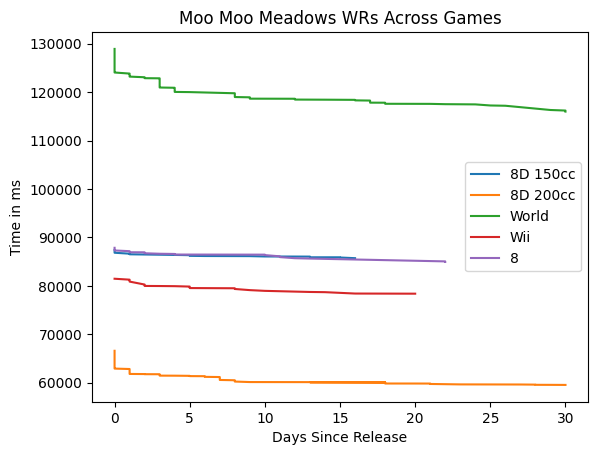

In [45]:
# Should change into a function later
# Just looking at Moo Moo Meadows as an example for now
df_mk8d_150_fm = getFirstMonth(df_mk8d_150)
df_mk8d_150_fm = df_mk8d_150_fm.sort_values(by='Time',ascending=False)
df_mk8d_150_fm = df_mk8d_150_fm[df_mk8d_150_fm['Course']=="Wii Moo Moo Meadows"]

df_mk8d_200_fm = getFirstMonth(df_mk8d_200)
df_mk8d_200_fm = df_mk8d_200_fm.sort_values(by='Time',ascending=False)
df_mk8d_200_fm = df_mk8d_200_fm[df_mk8d_200_fm['Course']=="Wii Moo Moo Meadows"]

df_mkworld_fm = getFirstMonth(df_mkworld)
df_mkworld_fm = df_mkworld_fm.sort_values(by='Time',ascending=False)
df_mkworld_fm = df_mkworld_fm[df_mkworld_fm['Course']=="Moo Moo Meadows"]

df_mkwii_fm = getFirstMonth(df_mkwii)
df_mkwii_fm = df_mkwii_fm.sort_values(by='Time',ascending=False)
df_mkwii_fm = df_mkwii_fm[df_mkwii_fm['Course']=="Moo Moo Meadows"]

df_mk8_fm = getFirstMonth(df_mk8)
df_mk8_fm = df_mk8_fm.sort_values(by='Time',ascending=False)
df_mk8_fm = df_mk8_fm[df_mk8_fm['Course']=="Wii Moo Moo Meadows"]

plt.plot(df_mk8d_150_fm['SinceRelease'],df_mk8d_150_fm['Time'],label="8D 150cc")
plt.plot(df_mk8d_200_fm['SinceRelease'], df_mk8d_200_fm['Time'],label="8D 200cc")
plt.plot(df_mkworld_fm['SinceRelease'],df_mkworld_fm['Time'],label="World")
plt.plot(df_mkwii_fm['SinceRelease'],df_mkwii_fm['Time'],label="Wii")
plt.plot(df_mk8_fm['SinceRelease'],df_mk8_fm['Time'],label="8")

plt.legend()
plt.title("Moo Moo Meadows WRs Across Games")
plt.ylabel("Time in ms")
plt.xlabel("Days Since Release")

Text(0.5, 0, 'Days Since Release')

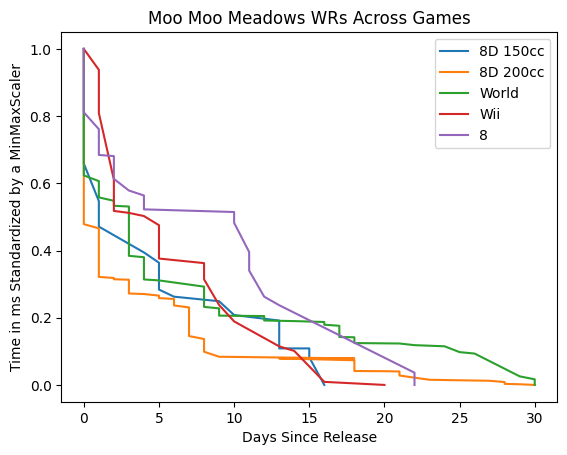

In [46]:
#Get min max graph
from sklearn.preprocessing import MinMaxScaler
import numpy as np

plt.plot(df_mk8d_150_fm['SinceRelease'],
         MinMaxScaler().fit_transform(np.array(df_mk8d_150_fm['Time']).reshape(-1,1)),
         label="8D 150cc")
plt.plot(df_mk8d_200_fm['SinceRelease'],
         MinMaxScaler().fit_transform(np.array(df_mk8d_200_fm['Time']).reshape(-1,1)),
         label="8D 200cc")
plt.plot(df_mkworld_fm['SinceRelease'],
         MinMaxScaler().fit_transform(np.array(df_mkworld_fm['Time']).reshape(-1,1)),
         label="World")
plt.plot(df_mkwii_fm['SinceRelease'],
         MinMaxScaler().fit_transform(np.array(df_mkwii_fm['Time']).reshape(-1,1)),
         label="Wii")
plt.plot(df_mk8_fm['SinceRelease'],
         MinMaxScaler().fit_transform(np.array(df_mk8_fm['Time']).reshape(-1,1)),
         label="8")


plt.legend()
plt.title("Moo Moo Meadows WRs Across Games")
plt.ylabel("Time in ms Standardized by a MinMaxScaler")
plt.xlabel("Days Since Release")